In [1]:
from sympy import *
import numpy as np
from control.matlab import *
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import control as ct
from IPython.display import display, Latex
import plotly.graph_objects as go
import pandas as pd


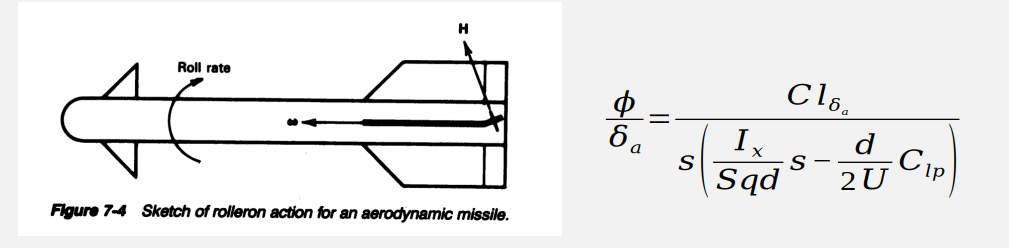

Compensar para wn=4, zeda=0.5

In [53]:
def update_plot(k):
    sys=ct.tf([4], [1, 2, 0])
   

    syscl=ct.feedback(sys*k,1)
    roots=ct.pzmap(syscl, plot=True)[0]
    #close the loop of sys
    kv=np.arange(0, 101)
    #kv=vector de 0 a 10000


    # Plot the root locus
    ct.root_locus(sys,xlim=[-4,0],ylim=[-4,4])
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.title('Root Locus')
    plt.text(1.1, 1, sys, horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, fontsize=15)
    plt.text(1.1, 0.5, syscl, horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, fontsize=15)

    plt.plot(np.real(roots), np.imag(roots), 'ro')

    plt.figure(2)
    y, T = step(syscl)
    plt.plot(T, y)
    plt.grid('on')
    plt.show(block=True)


interact(update_plot, k=(0.1, 100, 1))

interactive(children=(FloatSlider(value=49.1, description='k', min=0.1, step=1.0), Output()), _dom_classes=('w…

<function __main__.update_plot(k)>

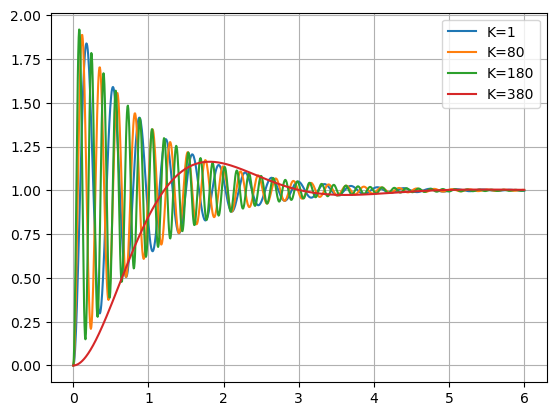

In [43]:
sys=ct.tf([4], [1, 2, 0])
syscl=ct.feedback(sys,1)
syscl80=ct.feedback(sys*80,1)
syscl180=ct.feedback(sys*180,1)
syscl380=ct.feedback(sys*380,1)
t=np.linspace(0, 6, 1000)


plt.figure(1)
y80, T80 = step(syscl80,t)
plt.plot(T80, y80)
y180, T180 = step(syscl180,t)
plt.plot(T180, y180)
y380, T380 = step(syscl380,t)
plt.plot(T380, y380)
y, T = step(syscl,t)
plt.plot(T, y)
plt.legend(['K=1', 'K=80', 'K=180', 'K=380'])
plt.grid('on')
plt.show(block=True)

In [44]:
import plotly.graph_objects as go
import pandas as pd

df = pd.DataFrame({'t': T, 'y': y,'t80': T80, 'y80': y80,'t180': T180, 'y180': y180,'t380': T380, 'y380': y380})

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['t'], y=df['y'], mode='lines', name='K=1'))
fig.add_trace(go.Scatter(x=df['t'], y=df['y80'], mode='lines', name='K=80'))
fig.add_trace(go.Scatter(x=df['t'], y=df['y180'], mode='lines', name='K=180'))
fig.add_trace(go.Scatter(x=df['t'], y=df['y380'], mode='lines', name='K=380'))
fig.update_layout(autosize=False,
                  width=1200,
                  height=600,
                  title='Missile Roll Motion',
                  xaxis_title='Tiempo [S]',
                  yaxis_title='phi',
                  legend_title='Ganancias',
                  showlegend=True)
fig.show()

In [54]:
##aplicamos atraso adelanto


def update_plot(k):
    sys=ct.tf([4], [1, 2, 0])
    T1=0.21
    T2=10
    b=3.5
    glead=ct.tf([1, 1/T1], [1, b/T1])
    glag=ct.tf([1, 1/T2], [1, 1/b/T2])
    gc=glead*glag
    syscl=ct.feedback(k*sys*gc,1)

    roots=ct.pzmap(syscl, plot=True)[0]
    #close the loop of sys

    # Plot the root locus
    ct.root_locus(sys*gc,xlim=[-4,0],ylim=[-4,4])
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.title('Root Locus')
    plt.text(1.1, 1, sys, horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, fontsize=15)
    plt.text(1.1, 0.5, syscl, horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, fontsize=15)

    plt.plot(np.real(roots), np.imag(roots), 'ro')

    plt.figure(2)
    yc, Tc = step(syscl,t)
    plt.plot(Tc, yc)
    plt.grid('on')
    plt.show(block=True)


interact(update_plot, k=(0.1, 100, 1))

interactive(children=(FloatSlider(value=49.1, description='k', min=0.1, step=1.0), Output()), _dom_classes=('w…

<function __main__.update_plot(k)>

In [55]:
sys=ct.tf([4], [1, 2, 0])
k=12
T1=0.21
T2=10
b=3.5
glead=ct.tf([1, 1/T1], [1, b/T1])
glag=ct.tf([1, 1/T2], [1, 1/b/T2])
gc=glead*glag
syscl=ct.feedback(k*sys*gc,1)
yc, Tc = step(syscl,t)

df = pd.DataFrame({'t': T, 'y': y, 'yc': yc})

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['t'], y=df['y'], mode='lines', name='sys'))
fig.add_trace(go.Scatter(x=df['t'], y=df['yc'], mode='lines', name='sysComp'))
fig.update_layout(autosize=False,
                  width=1200,
                  height=600,
                  title='Missile Roll Motion',
                  xaxis_title='Tiempo [S]',
                  yaxis_title='phi',
                  legend_title='Ganancias',
                  showlegend=True)
fig.show()

In [63]:
##aplicamos 


def update_plot(k,Z):
    sys=ct.tf([4], [1, 2, 0])
    glead=ct.tf([1, Z], [1])
    gc=glead
    syscl=ct.feedback(k*sys*gc,1)

    roots=ct.pzmap(syscl, plot=True)[0]
    #close the loop of sys

    # Plot the root locus
    ct.root_locus(sys*gc,xlim=[-4,0],ylim=[-4,4])
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.title('Root Locus')
    plt.text(1.1, 1, sys, horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, fontsize=15)
    plt.text(1.1, 0.5, syscl, horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, fontsize=15)

    plt.plot(np.real(roots), np.imag(roots), 'ro')

    plt.figure(2)
    yc, Tc = step(syscl,t)
    plt.plot(Tc, yc)
    plt.grid('on')
    plt.show(block=True)


interact(update_plot, k=(0.01, 1, 0.01),Z=(0, 10, 1))

interactive(children=(FloatSlider(value=0.5, description='k', max=1.0, min=0.01, step=0.01), IntSlider(value=5…

<function __main__.update_plot(k, Z)>